## Part 3 Loading Data & EDA

Import relevant packages for the following parts

In [1]:
import numpy as np
import pandas as pd
import math
import re
import sys

from gensim.models.word2vec import Word2Vec

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from preprocessing import get_processed_data
import csv

### Import data cleaned by using the selfwritten preprocessing module

In [2]:
moria_df=get_processed_data('moria-data')


loading files...
C:\Users\nikodemicek\Documents\GitHub\refugee_project/../../../CBS - Copenhagen Business School/Kick-Ass Master Thesis - General/Data/moria-data/Raw Data/
Reading file: C:\Users\nikodemicek\Documents\GitHub\refugee_project/../../../CBS - Copenhagen Business School/Kick-Ass Master Thesis - General/Data/moria-data/Raw Data\Sheet 1.csv
Reading file: C:\Users\nikodemicek\Documents\GitHub\refugee_project/../../../CBS - Copenhagen Business School/Kick-Ass Master Thesis - General/Data/moria-data/Raw Data\Sheet 10.csv
Reading file: C:\Users\nikodemicek\Documents\GitHub\refugee_project/../../../CBS - Copenhagen Business School/Kick-Ass Master Thesis - General/Data/moria-data/Raw Data\Sheet 2.csv
Reading file: C:\Users\nikodemicek\Documents\GitHub\refugee_project/../../../CBS - Copenhagen Business School/Kick-Ass Master Thesis - General/Data/moria-data/Raw Data\Sheet 3.csv
Reading file: C:\Users\nikodemicek\Documents\GitHub\refugee_project/../../../CBS - Copenhagen Business Scho

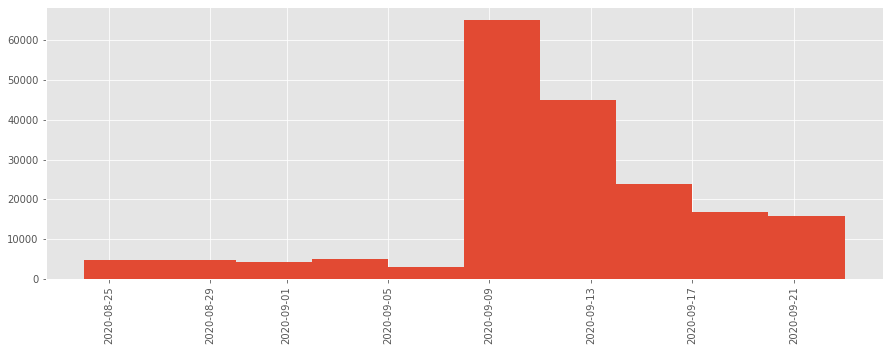

In [3]:
moria_df.reset_index(drop=True, inplace=True)
#type(contents)
moria_df['Date Short'] = pd.to_datetime(moria_df['Date Short'])
moria_df = moria_df.set_index(moria_df['Date Short'])
moria_df = moria_df.sort_index()

moria_df.head()
#moria_df['Date Short'].sort_values()
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)

moria_df['Date Short'].hist()

In [ ]:
moria_df['Date'].hist()

In [ ]:
event_date = '2020-09-08'


# create train test partition
pre_event = moria_df[:event_date]
post_event  = moria_df[event_date:]


#pre_event = moria_df.loc(moria_df['Date Short'] < event_date)
#post_event = moria_df.loc(moria_df['Date Short']>= event_date)

print('Train Dataset:',train.shape)
print('Test Dataset:',test.shape)


In [ ]:
pre_event.head(20)

Also delete duplicate tweets. 

In [ ]:
#maybe we should keep the one with highest Reach? or other metric?
moria_df.drop_duplicates(subset ="Tweet Raw", inplace = True) 


---

### EDA

what features can we do:
length of tweet (words, characters) (int)
length of cleaned tweet (words) (int)
hashtags used (list)
no. of hashtags (int)


In [ ]:
moria_df.reset_index(drop=True, inplace=True)



In [ ]:
pd.set_option('display.max_colwidth',None)
print(moria_df['Tweet Raw'].loc[[10]])
print(moria_df['Tweet Clean'].loc[[10]])

In [ ]:
from wordcloud import WordCloud

def get_wordcloud(df):
    #collocations = including bigrams
    cloud = WordCloud(background_color='white',
                      collocations = False, 
                      width=1600, 
                      height=800).generate(' '.join(df['Tweet Clean']))
    plt.figure(figsize=(20,10))
    plt.imshow(cloud)
    plt.axis('off')
    return plt.show()





In [ ]:
get_wordcloud(pre_event)

get_wordcloud(post_event)

In [ ]:
import seaborn as sns

def bar_chart(dfSeries):
    plt.figure(figsize=(12,6))
    ax = dfSeries.value_counts().plot(kind = 'bar')
    for p in ax.patches:
        ax.annotate(str(round(p.get_height()/dfSeries.shape[0]*100,2))+'%', (p.get_x()+0.2, p.get_height() * 0.5))


In [ ]:
bar_chart(pre_event.Sentiment)

In [ ]:
bar_chart(post_event.Sentiment)

In [ ]:
moria_df["Country"].value_counts()

In [ ]:
moria_df['Reach'].describe()


In [ ]:
print('Mean reach:',round(moria_df["Reach"].mean(),2))
print('Median reach:',moria_df["Reach"].median())
print('Max reach:', max(moria_df["Reach"]))

In [ ]:
def plot_hist(measure = 'Reach'):
    print("Number of Unique {}: {}".format(measure, str(len(moria_df[measure].unique()))))
    print("{} Median: {}".format(measure, str(moria_df[measure].median())))
    print(moria_df[measure].describe())
    plt.figure(figsize=(14,4))
    plt.hist(moria_df[measure], bins = 100)
    plt.show()

    
plot_hist()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(14,4))
ax.hist(moria_df["Alternate Date Format"], bins=10)
ax.set_xlabel("Reach")
ax.set_ylabel("Number of apps per bin")

fig.tight_layout(pad=0.5)

https://benlevyx.github.io/twitter-polling/eda/

have a similar chart but display how the sentiment/topics (or mixture = combined chart) changes over time (instead of no. of likes)

heatmap for tweets that have several topics, or in overall the correlation of events



We could do a heatmap with words in a similar way as here:

![title](https://pytorch.org/tutorials/_images/sphx_glr_seq2seq_translation_tutorial_004.png)

found on https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html